In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import glob
from PIL import Image
import os
import matplotlib.animation as animation
from scipy.optimize import fsolve
from matplotlib.pyplot import gca,show
from matplotlib.offsetbox import AnchoredText
import scipy.integrate as integrate

# Tarefa 4

In [29]:
####### Constants #######
c=0.23
N=2
D,p=[N-(N-1),N-1]

####### Time or scale factor #######
s=0 #0 scale factor,  1 time
ss=["a","t"]

####### Intial Conditions ######
v0,xi0,x0_log,beta0=(0.1,10,-20,0.01)
xf_log,betaf=(10,1-p/N)

####### Lists #######
Ntimes=1000
Nbeta=100
x=np.logspace(x0_log,xf_log,Ntimes)
v=np.zeros((Nbeta,Ntimes))
xi=np.zeros((Nbeta,Ntimes))
beta=np.linspace(beta0,betaf,Nbeta)
v[:,0]=v0
xi[:,0]=xi0


In [30]:
if s==0:
    a=np.zeros((Nbeta,Ntimes))
    for i,beta_i in enumerate(beta):
        a[i,:]=x**beta_i

In [31]:
def make_gif(frame_folder,option):
    files = sorted(glob.glob(f"{frame_folder}/*.png"),key=os.path.getctime)
    image_array = [Image.open(my_file) for my_file in files]
    fig, ax = plt.subplots()
    
    im = ax.imshow(image_array[0], animated=True)
    ax.axis('off')
    def update(i):
        im.set_array(image_array[i])
        return im,
    animation_fig = animation.FuncAnimation(fig, update, frames=len(image_array), interval=200, blit=True,repeat_delay=10,)
    animation_fig.save(f"{frame_folder}/animated_GMM_{ss[s]}.gif")
    
    if option==1:
        for filename in glob.glob(f'{frame_folder}/*.png'):
            os.remove(filename)
 

def k(v_i):
    return 2*mt.sqrt(2)/mt.pi*(1-v_i**2)*(1+2*mt.sqrt(2)*v_i**3)*(1-8*v_i**6)/(1+8*v_i**6)

def xi_t(xi_i,v_i,x_i,beta_i,dx,s):
    xi_j = beta_i**s*dx/x_i*(xi_i*(1+v_i**2*(p+1)/D)-(xi_i-c*v_i/D)/beta_i)+xi_i
    return xi_j

def v_t(xi_i,v_i,x_i,beta_i,dx,s):
    v_j = -(1-v_i**2)*beta_i**s*dx/x_i*((p+1)*v_i-k(v_i)/(beta_i*xi_i))+v_i
    return v_j

In [32]:
###### Regime linear ######
vl=np.zeros(Nbeta)
xil=np.zeros(Nbeta)

def equations(vars):
        vl_i, xil_i=vars
        k=2*mt.sqrt(2)/mt.pi*(1-vl_i**2)*(1+2*mt.sqrt(2)*vl_i**3)*(1-8*vl_i**6)/(1+8*vl_i**6)
        eq2 = xil_i - mt.sqrt(abs(k*(k+c)/(beta_i*(1-beta_i)*D*(p+1))))
        eq1 = vl_i - mt.sqrt(abs((1-beta_i)*k*D/(beta_i*(k+c)*(p+1))))
        return [eq1, eq2]

for i in range(0,len(beta)):
    beta_i=beta[i]
    vl[i], xil[i] =  fsolve(equations, [0.7,0])

In [33]:
for i,beta_i in enumerate(beta):
    for j in range(1,len(x)):
        if s==0:
            x=a[i,:]
        dx=x[j]-x[j-1]
        v[i,j]=v_t(xi[i,j-1],v[i,j-1],x[j],beta_i,dx,s)
        xi[i,j]=xi_t(xi[i,j-1],v[i,j-1],x[j],beta_i,dx,s)

In [34]:
for i,beta_i in enumerate(beta):
    plt.plot(x,xi[i,:])
    plt.xlabel(ss[s])
    plt.ylabel(r"$\xi$")
    plt.xscale("log")
    plt.title(rf"$\beta = {beta_i:.2f}$")
    plt.axhline(xil[i],linestyle='--')
    ax = plt.gca()
    anchored_text_ = AnchoredText(r"$\mathbf{\tilde{c} = %s}$" %(c), loc=4)
    ax.add_artist(anchored_text_)
    plt.savefig(f"xi/plot_xi{i}.png")
    plt.close()
    plt.plot(x,v[i,:])
    plt.xlabel(ss[s])
    plt.ylabel(r"$\bar{v}$")
    plt.xscale("log")
    plt.title(rf"$\beta = {beta_i:.2f}$")
    plt.axhline(vl[i],linestyle='--')
    ax = plt.gca()
    anchored_text_ = AnchoredText(r"$\mathbf{\tilde{c} = %s}$" %(c), loc=4)
    ax.add_artist(anchored_text_)
    plt.savefig(f"v/plot_v{i}.png")
    plt.close()

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


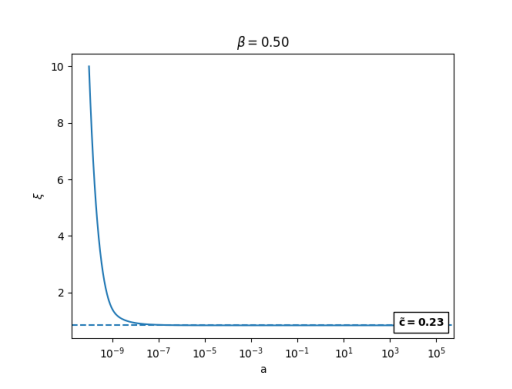

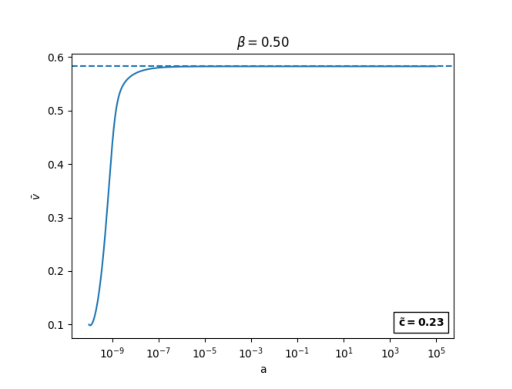

In [35]:
d=1
make_gif("xi",d)
make_gif("v",d)

# Tarefa 5

In [199]:
h=0.678
h0=2.13*h*1e-33

H = 71.0 ## Hubble Constant = 71 km/s/Mpc
Mpc = 3.085677581e+19 #kms
km = 1.0
Gyr= 3.1536e16 #seconds
#h0 = (H* Gyr * km / Mpc)



Or0=9.1276e-5
Om0=0.308
Ol0=1-Om0-Or0

In [200]:
def hubble(a):
    return h0**2*(Om0*a**(-3)+Or0*a**(-4)+Ol0)

In [201]:
####### Constants #######
c=0.23
N=2
D,p=[N-(N-1),N-1]

####### Time or scale factor #######
s=0 #0 scale factor,  1 time
ss=["a","t"]
a0=0 #1
t0=0#9.187 #Gyr

####### Intial Conditions ######
v0,xi0,x0_log=(0.1,10,-20)
xf_log=1

####### Lists #######
Ntimes=1000
x=np.logspace(x0_log,xf_log,Ntimes)
v=np.zeros(Ntimes)
xi=np.zeros(Ntimes)
v[0]=v0
xi[0]=xi0


In [202]:
t=[integrate.quad(lambda x: (x*mt.sqrt(hubble(x)))**(-1),a0,x_i)[0]+t0 for x_i in x]

In [203]:
def k(v_i):
    return 2*mt.sqrt(2)/mt.pi*(1-v_i**2)*(1+2*mt.sqrt(2)*v_i**3)*(1-8*v_i**6)/(1+8*v_i**6)

def xi_t(xi_i,v_i,x_i,t_i,dx):
    xi_j = dx/x_i*(xi_i*(1+v_i**2*(p+1)/D)-(xi_i-c*v_i/D)/(t_i*mt.sqrt(hubble(x_i))))+xi_i
    return xi_j

def v_t(xi_i,v_i,x_i,t_i,dx):
    v_j = -(1-v_i**2)*dx/x_i*((p+1)*v_i-k(v_i)/(xi_i*mt.sqrt(hubble(x_i))*t_i))+v_i
    return v_j

In [204]:
for i in range(1,len(x)):
    dx=x[i]-x[i-1]
    v[i]=v_t(xi[i-1],v[i-1],x[i],t[i],dx)
    xi[i]=xi_t(xi[i-1],v[i-1],x[i],t[i],dx)

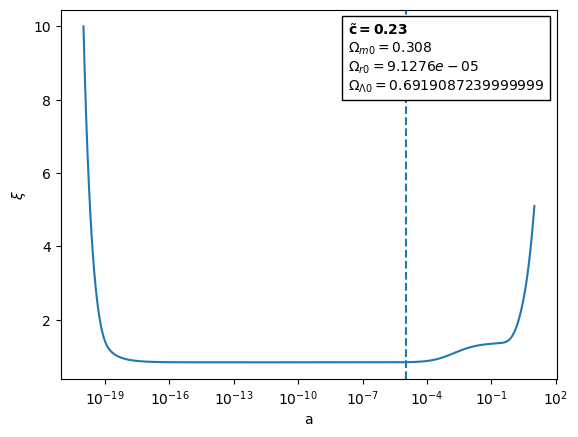

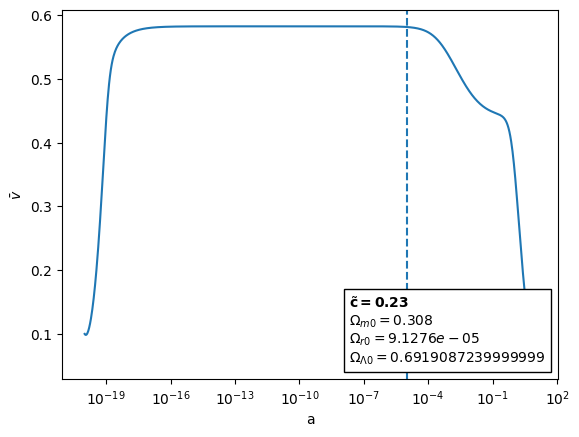

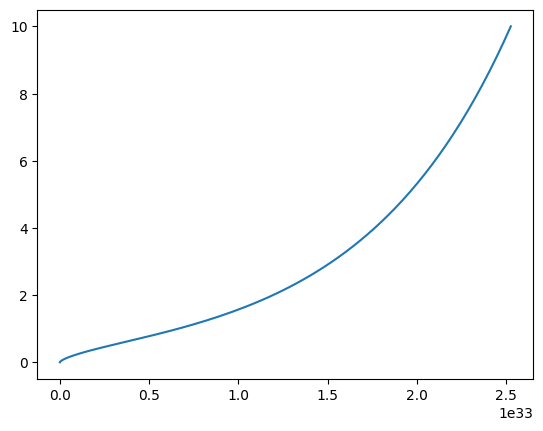

In [205]:
plt.plot(x,xi)
plt.xlabel(ss[s])
plt.ylabel(r"$\xi$")
plt.xscale("log")
plt.axvline(1e-5,linestyle="--")
ax = plt.gca()
anchored_text_ = AnchoredText(r"$\mathbf{\tilde{c} = %s}$" %(c)+ '\n'\
                              r"$\Omega_{m0}=%s$" %(Om0)+ '\n'\
                              r"$\Omega_{r0}=%s$" %(Or0)+ '\n'\
                              r"$\Omega_{\Lambda 0}=%s$" %(Ol0), loc=1)
ax.add_artist(anchored_text_)
plt.savefig(f"xi/plot_xi{i}_{Ol0}.png")
plt.show()
plt.plot(x,v)
plt.xlabel(ss[s])
plt.ylabel(r"$\bar{v}$")
plt.xscale("log")
ax = plt.gca()
anchored_text_ = AnchoredText(r"$\mathbf{\tilde{c} = %s}$" %(c)+ '\n'\
                              r"$\Omega_{m0}=%s$" %(Om0)+ '\n'\
                              r"$\Omega_{r0}=%s$" %(Or0)+ '\n'\
                              r"$\Omega_{\Lambda 0}=%s$" %(Ol0), loc=4)
ax.add_artist(anchored_text_)
plt.axvline(1e-5,linestyle="--")
plt.savefig(f"v/plot_v{i}_{Ol0}.png")
plt.show()
plt.plot(t,x)
plt.show()